In [1]:
from phimal_utilities.analysis import Results, load_tensorboard
import numpy as np
import os
from natsort import natsorted

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

%config InlineBackend.figure_format = 'svg'

sns.set_context('paper')
sns.set_style('white')

In [79]:
# Loading files from baseline
files = natsorted([file for file in os.listdir('data_high_noise/') if file[:len('baseline')] == 'baseline'])
df_bl = [load_tensorboard(f'data_high_noise/{file}') for file in files]

keys = Results('data/baseline_run_0/').keys # loading keys

In [80]:
# Loading files from multitask
files = natsorted([file for file in os.listdir('data_high_noise/') if file[:len('multitask')] == 'multitask'])
df_mt = [load_tensorboard(f'data_high_noise/{file}') for file in files]

Text(0.5, 1.0, 'MSE')

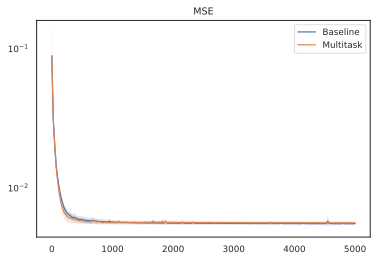

In [81]:
# Averaging runs MSE
epoch = df_bl[0].index.to_numpy().squeeze()
average_mse_bl = np.mean(np.stack([df[keys['mse']] for df in df_bl], axis=1), axis=1).squeeze()
std_mse_bl = np.std(np.stack([df[keys['mse']] for df in df_bl], axis=1), axis=1).squeeze()

average_mse_mt = np.mean(np.stack([df[keys['mse']] for df in df_mt], axis=1), axis=1).squeeze()
std_mse_mt = np.std(np.stack([df[keys['mse']] for df in df_mt], axis=1), axis=1).squeeze()

# Plottting
plt.fill_between(epoch, average_mse_bl - std_mse_bl, average_mse_bl + std_mse_bl, alpha=0.2)
plt.plot(epoch, average_mse_bl, label='Baseline')

plt.fill_between(epoch, average_mse_mt - std_mse_mt, average_mse_mt + std_mse_mt, alpha=0.2)
plt.plot(epoch, average_mse_mt, label='Multitask')


plt.yscale('log')
plt.legend()
plt.title('MSE')

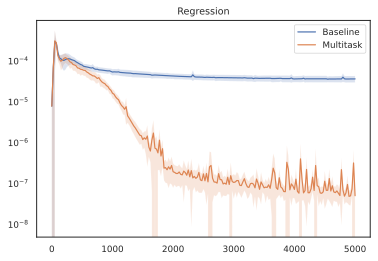

In [82]:
plt.title('Regression')

# Averaging runs Reg
epoch = df_bl[0].index.to_numpy().squeeze()
average_reg_bl = np.mean(np.stack([df[keys['reg']] for df in df_bl], axis=1), axis=1).squeeze()
std_reg_bl = np.std(np.stack([df[keys['reg']] for df in df_bl], axis=1), axis=1).squeeze()

average_reg_mt = np.mean(np.stack([df[keys['reg']] for df in df_mt], axis=1), axis=1).squeeze()
std_reg_mt = np.std(np.stack([df[keys['reg']] for df in df_mt], axis=1), axis=1).squeeze()

# Plottting
plt.fill_between(epoch, average_reg_bl - std_reg_bl, average_reg_bl + std_reg_bl, alpha=0.2)
plt.plot(epoch, average_reg_bl, label='Baseline')

plt.fill_between(epoch, average_reg_mt - std_reg_mt, average_reg_mt + std_reg_mt, alpha=0.2)
plt.plot(epoch, average_reg_mt, label='Multitask')


plt.yscale('log')
plt.legend()

In [83]:
true_coeffs = np.zeros_like(df_mt[0][keys['unscaled_coeffs']].tail(1).to_numpy())
true_coeffs[0, 2] = 0.1
true_coeffs[0, 5] = -1

In [84]:
MAE_mt = np.mean([np.mean(np.abs(df[keys['unscaled_coeffs']] - true_coeffs), axis=1) for df in df_mt], axis=0)
MAE_bl = np.mean([np.mean(np.abs(df[keys['unscaled_coeffs']] - true_coeffs), axis=1) for df in df_bl], axis=0)

MAE_mt_std = np.mean([np.std(np.abs(df[keys['unscaled_coeffs']] - true_coeffs), axis=1) for df in df_mt], axis=0)
MAE_bl_std = np.mean([np.std(np.abs(df[keys['unscaled_coeffs']] - true_coeffs), axis=1) for df in df_bl], axis=0)

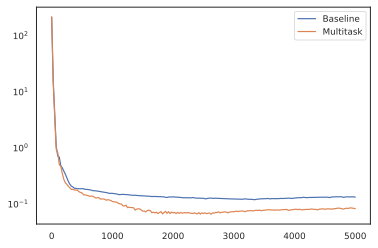

In [85]:
#plt.fill_between(epoch, MAE_bl - MAE_bl_std, MAE_bl + MAE_bl_std)
plt.plot(epoch, MAE_bl, label='Baseline')

#plt.fill_between(epoch, MAE_mt - MAE_mt_std, MAE_mt + MAE_mt_std)
plt.plot(epoch, MAE_mt, label='Multitask')


plt.yscale('log')
plt.legend()

(-2.0, 2.0)

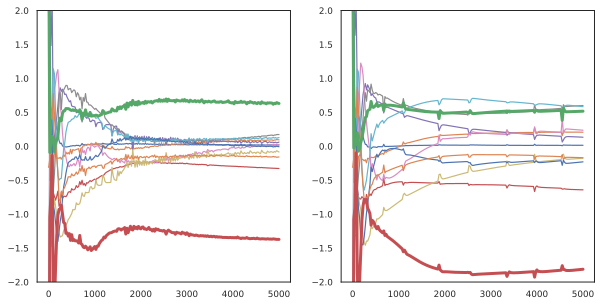

In [86]:
plt.figure(figsize=(10, 5))

run = 4

plt.subplot(121)
plt.plot(df_mt[run][keys['coeffs']])
plt.plot(df_mt[run][keys['coeffs'][2]], lw=3)
plt.plot(df_mt[run][keys['coeffs'][5]], lw=3)
plt.ylim([-2, 2])

plt.subplot(122)

plt.plot(df_bl[run][keys['coeffs']])
plt.plot(df_bl[run][keys['coeffs'][2]], lw=3)
plt.plot(df_bl[run][keys['coeffs'][5]], lw=3)
plt.ylim([-2, 2])

(-2.0, 2.0)

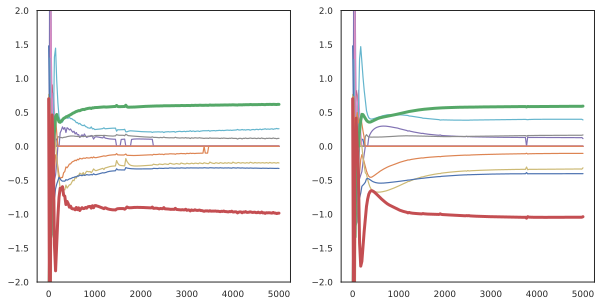

In [93]:
plt.figure(figsize=(10, 5))

run = 3

plt.subplot(121)
plt.plot(df_mt[run][keys['estimator_coeffs']])
plt.plot(df_mt[run][keys['estimator_coeffs'][2]], lw=3)
plt.plot(df_mt[run][keys['estimator_coeffs'][5]], lw=3)
plt.ylim([-2, 2])

plt.subplot(122)

plt.plot(df_bl[run][keys['estimator_coeffs']])
plt.plot(df_bl[run][keys['estimator_coeffs'][2]], lw=3)
plt.plot(df_bl[run][keys['estimator_coeffs'][5]], lw=3)
plt.ylim([-2, 2])